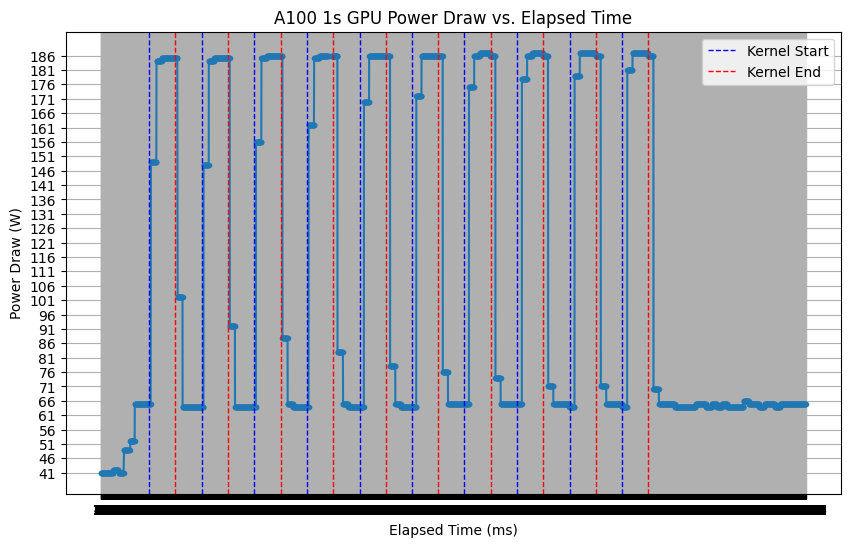

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'metrics.csv'
df = pd.read_csv(file_path)

# Rename columns to match your preferred format
df = df.rename(columns={
    'Timestamp(ms)': 'Elapsed Time (ms)',
    'Power(W)': 'Power Draw (W)'
})

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df["Elapsed Time (ms)"], df["Power Draw (W)"], marker='.', linestyle='-')
plt.title("A100 1s GPU Power Draw vs. Elapsed Time")
plt.xlabel("Elapsed Time (ms)")
plt.ylabel("Power Draw (W)")
plt.grid()

# Set y-axis ticks with a specific interval (e.g., 5)
y_min = int(df["Power Draw (W)"].min())
y_max = int(df["Power Draw (W)"].max()) + 1
plt.yticks(range(y_min, y_max + 1, 5))

# Set x-axis ticks - adjust the step based on your data range
x_min = int(df["Elapsed Time (ms)"].min())
x_max = int(df["Elapsed Time (ms)"].max())
plt.xticks(range(x_min, x_max + 1, 1))

# Add vertical lines for kernel start and end events
if 'Event' in df.columns:
    # Kernel start: blue, Kernel end: red
    for t in df[df['Event'] == 'Kernel start']["Elapsed Time (ms)"]:
        plt.axvline(x=t, color='blue', linestyle='--', linewidth=1, label='Kernel Start')
    for t in df[df['Event'] == 'Kernel end']["Elapsed Time (ms)"]:
        plt.axvline(x=t, color='red', linestyle='--', linewidth=1, label='Kernel End')

    # Add legend only once for each event
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

# Save the figure
plt.savefig('power_vs_time.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
